In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# import dataset
car= pd.read_csv("C:\\Users\\Administrator\\Documents\dat\\data-analysis-python-master\\data\\Car_data.csv")

In [6]:
#View data set
car.head()

,Unnamed: 0,Make,Model,Year,HP,Cylinders,Transmission Type,Drive Mode,MPG-H,MPG-C,Price
0,0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [7]:
car['Drive Mode'].unique()

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [8]:
# write user define function for ''Drive mode
# 1-rear wheel drive, 2-front wheel drive, 3-all wheel drive, 4-four wheel drive
 
def drive_mode(mode):
    if mode == 'rear wheel drive':
        return 1
    elif mode == 'front wheel drive':
        return 2
    elif mode == 'all wheel drive':
        return 3
    else:
        return 4
    
# use apply function
car['Drive Mode'] = car['Drive Mode'].apply(drive_mode)

In [9]:
car.head()

,Unnamed: 0,Make,Model,Year,HP,Cylinders,Transmission Type,Drive Mode,MPG-H,MPG-C,Price
0,0,BMW,1 Series M,2011,335.0,6.0,MANUAL,1,26,19,46135
1,1,BMW,1 Series,2011,300.0,6.0,MANUAL,1,28,19,40650
2,2,BMW,1 Series,2011,300.0,6.0,MANUAL,1,28,20,36350
3,3,BMW,1 Series,2011,230.0,6.0,MANUAL,1,28,18,29450
4,4,BMW,1 Series,2011,230.0,6.0,MANUAL,1,28,18,34500


In [10]:
car['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'UNKNOWN',
       'DIRECT_DRIVE'], dtype=object)

In [11]:
# Write user defined function to convert Transmission type to numbers
# 1-Manual, 2-Automatic, 3-Automated_Manual, 4-Unknown and 5-Direct_drive

def trans_type(type):
    if type == 'MANUAL':
        return 1
    elif type == 'AUTOMATED':
        return 2
    elif type == 'AUTOMATED_MANUAL':
        return 3
    elif type == 'UNKNOWN':
        return 4
    else:
        return 5

# use apply function
car['Transmission Type']= car['Transmission Type'].apply(trans_type)
        

In [12]:
car.head(3)

,Unnamed: 0,Make,Model,Year,HP,Cylinders,Transmission Type,Drive Mode,MPG-H,MPG-C,Price
0,0,BMW,1 Series M,2011,335.0,6.0,1,1,26,19,46135
1,1,BMW,1 Series,2011,300.0,6.0,1,1,28,19,40650
2,2,BMW,1 Series,2011,300.0,6.0,1,1,28,20,36350


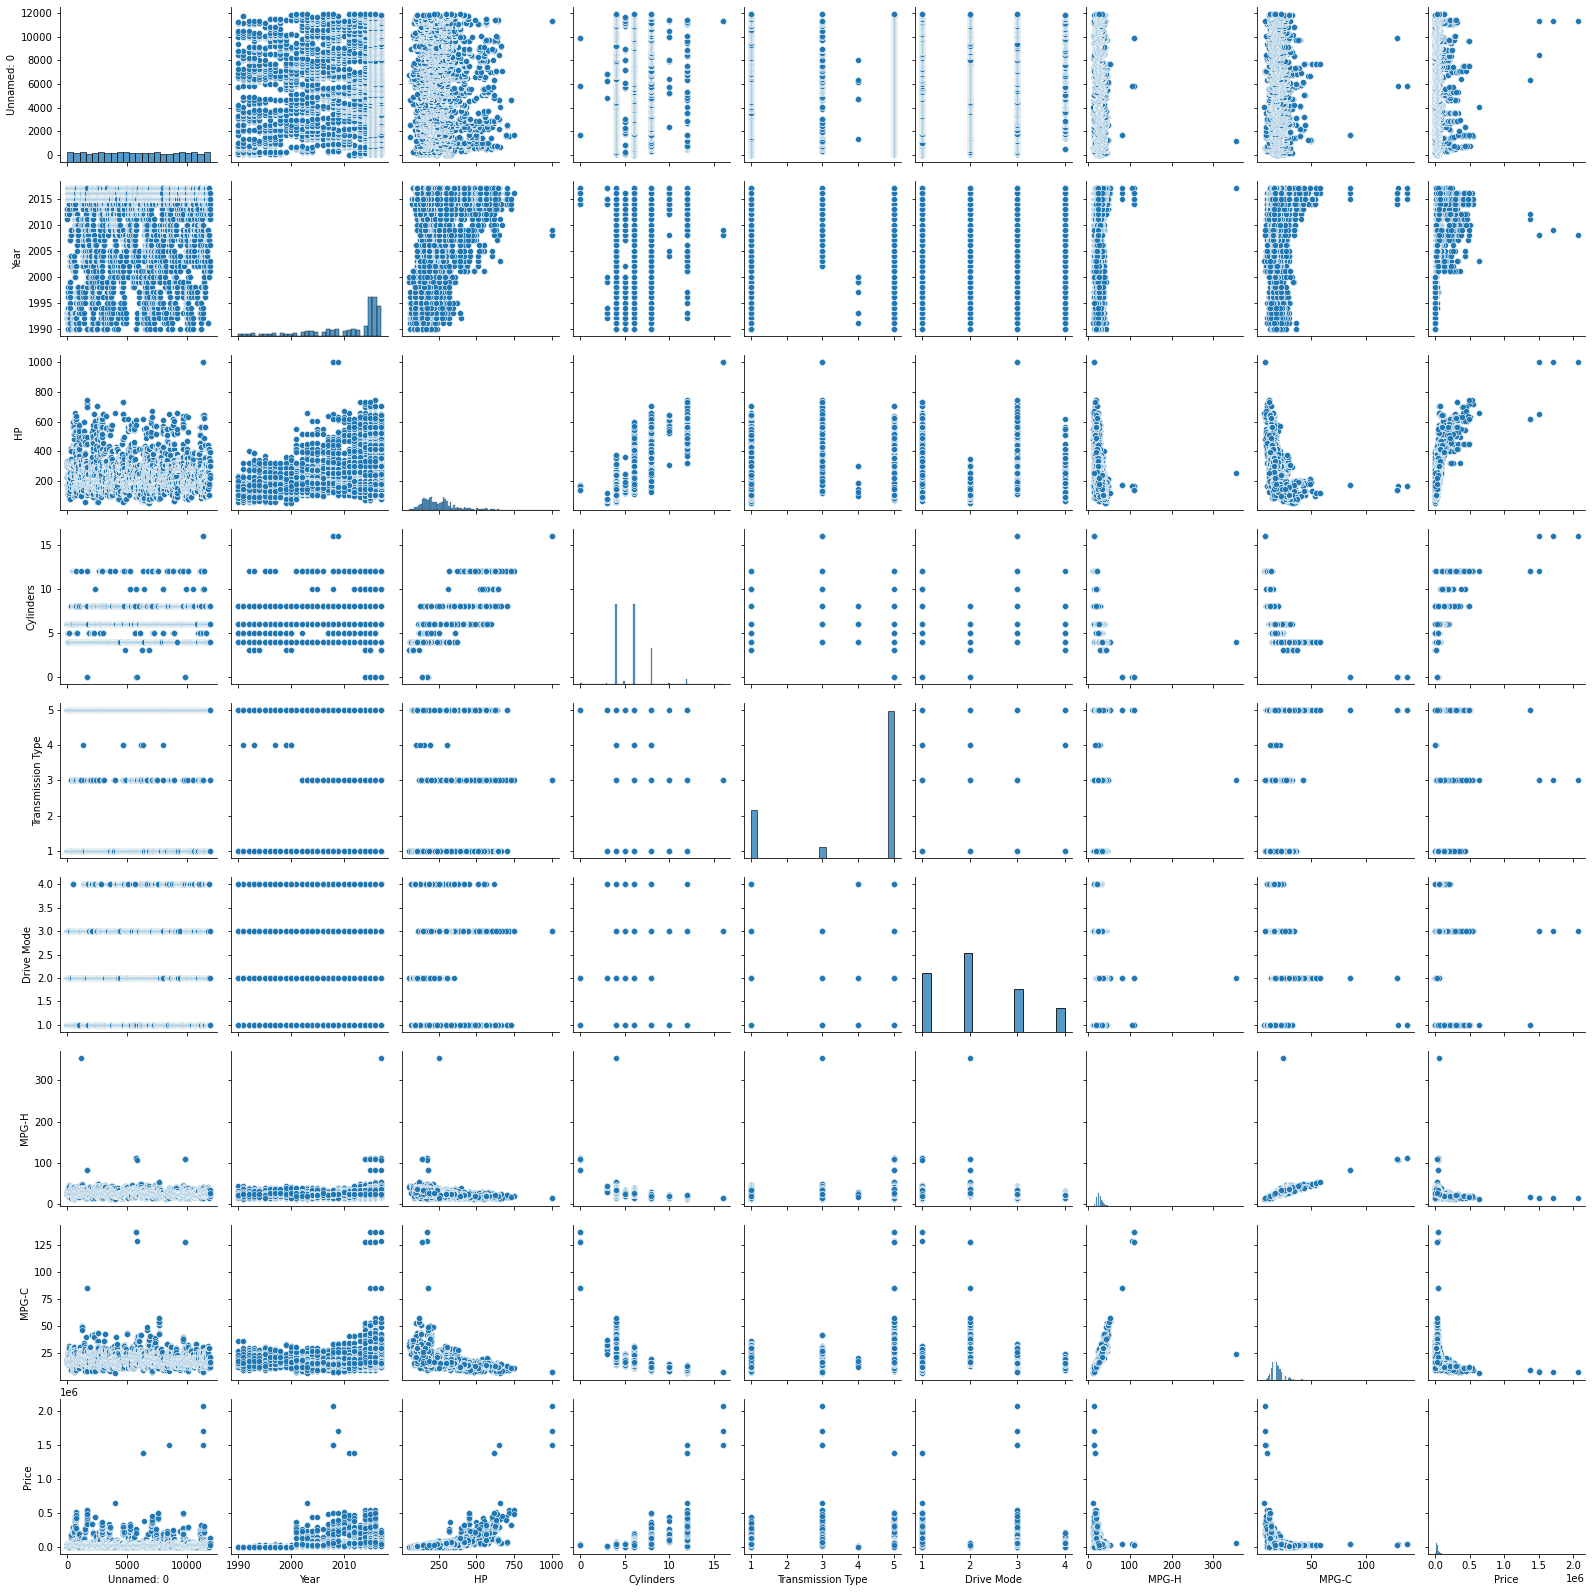

In [13]:
# draw a pairplot
sns.pairplot(car)

<AxesSubplot:>

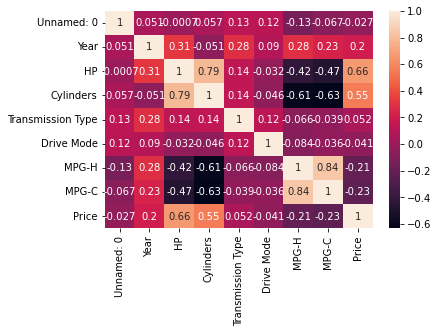

In [14]:
# check relationship between variables
car_corr = car.corr()
sns.heatmap(car_corr,annot=True)
#car_corr

In [73]:
#from sklearn.preprocessing import LableEncoder, OneHotEncoder

In [72]:
#Encoding Categorical Data
from sklearn.preprocessing import LableEncoder, OneHotEncoder
labelencoder = LabelEncoder()
car[:,6] = labelencoder.fit_transform(car[:, 6])


onehotencoder = OneHotEncoder(categorical_features = [6])
car= onehotencoder.fit_transform(car).toarray()

ImportError: cannot import name 'LableEncoder' from 'sklearn.preprocessing' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [14]:
lm= LinearRegression()

In [110]:
# Create feature from the dataset
X_feature= car[['HP']]
X_feature.head()

,HP
0,335.0
1,300.0
2,300.0
3,230.0
4,230.0


In [111]:
X_feature.shape

(10827, 1)

In [112]:
# Create target from the dataset 
Y_target = car[['Price']]
Y_target.head()

,Price
0,46135
1,40650
2,36350
3,29450
4,34500


In [113]:
Y_target.shape

(10827, 1)

In [114]:
lm.fit(X_feature,Y_target)

LinearRegression()

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X_feature, Y_target,test_size=0.2, random_state=0)

In [116]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8661, 1)
(8661, 1)
(2166, 1)
(2166, 1)


In [120]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [121]:
# print the intercept and coefficient
print(linreg.intercept_)
print(linreg.coef_)

[-53803.95243914]
[[378.23214106]]


In [122]:
# prediction
y_pred = linreg.predict(x_test)
print(y_pred)

[[ 44914.63637747]
 [ 25624.79718342]
 [158006.04655436]
 ...
 [ 18060.15436223]
 [ 54748.67204503]
 [ 53235.74348079]]


In [123]:
Y_target.head()

,Price
0,46135
1,40650
2,36350
3,29450
4,34500


In [124]:
# Check accuracy
from sklearn.metrics import r2_score

In [127]:
r2_score(y_test,y_pred)*100

45.048474419137754

In [126]:
print (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

44194.51802595921


In [3]:
import seaborn as sns

<AxesSubplot:xlabel='Transmission Type', ylabel='Price'>

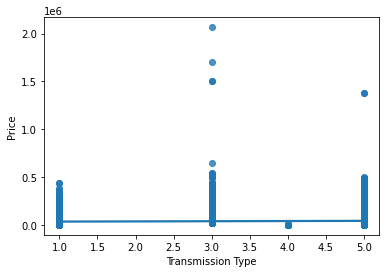

In [106]:
# Regression plot
sns.regplot(x='Transmission Type',y='Price', data=car)
#plt.ylim(0,)

In [69]:
3

3

<AxesSubplot:>

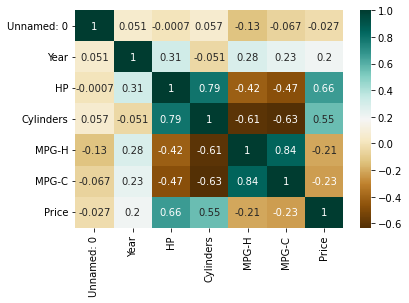

In [82]:
c= car.corr()
sns.heatmap(c,annot=True,cmap='BrBG')